## Please complete before submission:

**Name:** Adam Fairlie

**Student Number:** 2461352F

# TextAs Data Coursework

Please fill in this Google Colab by following the prompts from the coursework specification document and inserting your code in each relevant section.

- You should submit this notebook together with your report. (Two separate files)
- Specifcally you will submit **both a PDF with the report (so we can easily read it) and a .ipynb file containing the source code of your experiments as evidence**. Please do clean up your code where possible before submitting it.
- You may add whatever additional code and text blocks as needed (perhaps with [nice formatting](https://colab.research.google.com/notebooks/markdown_guide.ipynb)). Please keep the major headings (for the question numbers) the same.

As with labs, please remember to **Save a Copy to Drive** when you start working on this so that it is saved. Completing the labs provides essential knowledge for the successful completion of the coursework. 

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

DATA DOWNLOAD CODE REMOVED FROM THIS REPOSITORY FOR PRIVACY REASONS

In [181]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


## Q1:

### Q1a:

In [182]:
# Look at what a data entry looks like
train_data[0]

{'author': 'XC-XERZ',
 'body': 'Long story short, I saw ESO in my library, downloaded it and it let me play it. I don’t think there is a free trial going around. I’m sure I didn’t buy the game.',
 'id': 'queqfu',
 'score': 0,
 'subreddit': 'PS4',
 'title': 'Can I get banned for having a game that I didn’t buy in my library?'}

In [183]:
from collections import Counter
import pandas as pd
# Get counts
train_subreddit_counts = Counter([case['subreddit'] for case in train_data])
validation_subreddit_counts = Counter([case['subreddit'] for case in validation_data])
test_subreddit_counts = Counter([case['subreddit'] for case in test_data])
print("Training Counts:")
print(train_subreddit_counts)
print("Validation Counts:")
print(validation_subreddit_counts)
print("Test Counts:")
print(test_subreddit_counts)

# Find representations
print("\nSubreddit representations")
print("Training data:")
most_represented_train = train_subreddit_counts.most_common()[0][1] / len(train_data) * 100
least_represented_train = train_subreddit_counts.most_common()[-1][1] / len(train_data) * 100
train_difference = most_represented_train - least_represented_train
print(f'{most_represented_train:.2f}% - {least_represented_train:.2f}% ({train_difference:.2f}% difference)')
print("Validation data:")
most_represented_validation = validation_subreddit_counts.most_common()[0][1] / len(validation_data) * 100
least_represented_validation = validation_subreddit_counts.most_common()[-1][1] / len(validation_data) * 100
validation_difference = most_represented_validation - least_represented_validation
print(f'{most_represented_validation:.2f}% - {least_represented_validation:.2f}% ({validation_difference:.2f}% difference)')
print("Test data:")
most_represented_test = test_subreddit_counts.most_common()[0][1] / len(test_data) * 100
least_represented_test = test_subreddit_counts.most_common()[-1][1] / len(test_data) * 100
test_difference = most_represented_test - least_represented_test
print(f'{most_represented_test:.2f}% - {least_represented_test:.2f}% ({test_difference:.2f}% difference)')

Training Counts:
Counter({'tea': 146, 'NintendoSwitch': 145, 'PS4': 142, 'Coffee': 136, 'pcgaming': 135, 'HydroHomies': 134, 'xbox': 132, 'antiMLM': 128, 'Soda': 102})
Validation Counts:
Counter({'antiMLM': 54, 'NintendoSwitch': 52, 'tea': 48, 'Soda': 43, 'PS4': 43, 'pcgaming': 43, 'Coffee': 42, 'HydroHomies': 38, 'xbox': 37})
Test Counts:
Counter({'Coffee': 56, 'NintendoSwitch': 52, 'PS4': 48, 'pcgaming': 47, 'xbox': 44, 'antiMLM': 44, 'tea': 42, 'HydroHomies': 38, 'Soda': 29})

Subreddit representations
Training data:
12.17% - 8.50% (3.67% difference)
Validation data:
13.50% - 9.25% (4.25% difference)
Test data:
14.00% - 7.25% (6.75% difference)


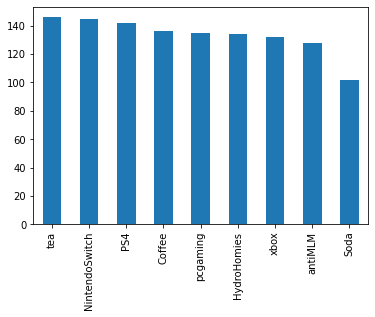

In [184]:
# Make train dataframe and get distributions
train_df = pd.DataFrame(train_data)
train_df["subreddit"].value_counts().plot(kind="bar")

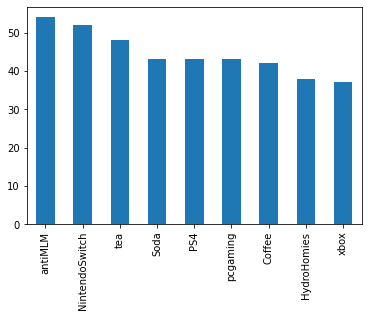

In [185]:
# Make validation dataframe and get distributions
validation_df = pd.DataFrame(validation_data)
validation_df["subreddit"].value_counts().plot(kind="bar")

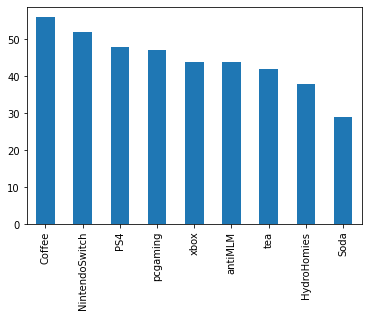

In [186]:
# Make test dataframe and get distributions
test_df = pd.DataFrame(test_data)
test_df["subreddit"].value_counts().plot(kind="bar")

### Q1b:

In [187]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
#!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

# Text pipeline
def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

# Make vectorizer
one_hot_vectorizer = CountVectorizer(tokenizer=text_pipeline_spacy, binary=True)
tfidf_vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy, binary=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [188]:
# Create features
onehot_train_features = one_hot_vectorizer.fit_transform(train_df['body'])
onehot_validation_features = one_hot_vectorizer.transform(validation_df['body'])
onehot_test_features = one_hot_vectorizer.transform(test_df['body'])

tfidf_train_features = tfidf_vectorizer.fit_transform(train_df['body'])
tfidf_validation_features = tfidf_vectorizer.transform(validation_df['body'])
tfidf_test_features = tfidf_vectorizer.transform(test_df['body'])

# Labels
train_labels = train_df['subreddit']
validation_labels = validation_df['subreddit']
test_labels = test_df['subreddit']



In [189]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

# Print evaluations
def evaluation_summary(description, true_labels, predictions):
  print("Evaluation for: " + description)
  print(classification_report(true_labels, predictions,  digits=3, zero_division=0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted

In [190]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Fit models

# Dummy Classifiers
# Stratified
dummy_strat = DummyClassifier(strategy='stratified')
dummy_strat.fit(onehot_train_features, train_labels)
# Most Frequent
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(onehot_train_features, train_labels)

# Logistic Regression (One-hot)
lr_onehot = LogisticRegression(solver='saga')
lr_onehot_model = lr_onehot.fit(onehot_train_features, train_labels)

# Logistic regression (TF-IDF)
lr_tfidf = LogisticRegression(solver='saga')
lr_tfidf_model = lr_tfidf.fit(tfidf_train_features, train_labels)

# SVC Model
svc = SVC(kernel="rbf")
svc_model = svc.fit(onehot_train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [191]:
print("Dummy Classifier (Stratified):")
dummy_strat_predicted_labels = dummy_strat.predict(onehot_test_features)
evaluation_summary("Dummy Prior", test_labels, dummy_strat_predicted_labels)

Dummy Classifier (Stratified):
Evaluation for: Dummy Prior
                precision    recall  f1-score   support

        Coffee      0.091     0.089     0.090        56
   HydroHomies      0.096     0.132     0.111        38
NintendoSwitch      0.128     0.096     0.110        52
           PS4      0.093     0.104     0.098        48
          Soda      0.054     0.069     0.061        29
       antiMLM      0.095     0.091     0.093        44
      pcgaming      0.073     0.064     0.068        47
           tea      0.163     0.167     0.165        42
          xbox      0.135     0.114     0.123        44

      accuracy                          0.102       400
     macro avg      0.103     0.103     0.102       400
  weighted avg      0.105     0.102     0.103       400


Confusion matrix:
 [[ 5  9  7 10  6  6  3  5  5]
 [ 7  5  6  3  2  4  5  4  2]
 [ 8  6  5  8  9  3  5  3  5]
 [ 5  5  5  5  6  5  7  6  4]
 [ 2  5  2  4  2  4  2  6  2]
 [ 7  8  3  9  1  4  4  2  6]
 [ 5  1  4

In [192]:
print("Dummy Classifier (Most Frequent):")
dummy_mf_predicted_labels = dummy_mf.predict(onehot_test_features)
evaluation_summary("Dummy Majority", test_labels, dummy_mf_predicted_labels)

Dummy Classifier (Most Frequent):
Evaluation for: Dummy Majority
                precision    recall  f1-score   support

        Coffee      0.000     0.000     0.000        56
   HydroHomies      0.000     0.000     0.000        38
NintendoSwitch      0.000     0.000     0.000        52
           PS4      0.000     0.000     0.000        48
          Soda      0.000     0.000     0.000        29
       antiMLM      0.000     0.000     0.000        44
      pcgaming      0.000     0.000     0.000        47
           tea      0.105     1.000     0.190        42
          xbox      0.000     0.000     0.000        44

      accuracy                          0.105       400
     macro avg      0.012     0.111     0.021       400
  weighted avg      0.011     0.105     0.020       400


Confusion matrix:
 [[ 0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 44  0]
 [ 0

In [193]:
print("Logistic Regression (One-hot):")
lr_onehot_predicted_labels = lr_onehot_model.predict(onehot_test_features)
evaluation_summary("LR onehot", test_labels, lr_onehot_predicted_labels)

Logistic Regression (One-hot):
Evaluation for: LR onehot
                precision    recall  f1-score   support

        Coffee      0.806     0.893     0.847        56
   HydroHomies      0.829     0.895     0.861        38
NintendoSwitch      0.837     0.692     0.758        52
           PS4      0.600     0.688     0.641        48
          Soda      0.774     0.828     0.800        29
       antiMLM      0.892     0.750     0.815        44
      pcgaming      0.643     0.574     0.607        47
           tea      0.860     0.881     0.871        42
          xbox      0.739     0.773     0.756        44

      accuracy                          0.770       400
     macro avg      0.776     0.775     0.773       400
  weighted avg      0.774     0.770     0.769       400


Confusion matrix:
 [[50  0  0  1  2  0  1  2  0]
 [ 0 34  0  1  1  1  0  1  0]
 [ 3  0 36  3  0  0  5  0  5]
 [ 1  0  3 33  1  0  6  0  4]
 [ 1  2  0  1 24  0  0  1  0]
 [ 3  3  0  2  1 33  0  2  0]
 [ 0  2  4  

In [231]:
print("Logistic Regression (TFIDF):")
lr_tfidf_predicted_labels = lr_tfidf_model.predict(tfidf_test_features)
evaluation_summary("LR TFIDF", test_labels, lr_tfidf_predicted_labels)

Logistic Regression (TFIDF):
Evaluation for: LR TFIDF
                precision    recall  f1-score   support

        Coffee      0.962     0.911     0.936        56
   HydroHomies      0.850     0.895     0.872        38
NintendoSwitch      0.750     0.865     0.804        52
           PS4      0.607     0.708     0.654        48
          Soda      0.957     0.759     0.846        29
       antiMLM      0.857     0.818     0.837        44
      pcgaming      0.581     0.532     0.556        47
           tea      0.812     0.929     0.867        42
          xbox      0.886     0.705     0.785        44

      accuracy                          0.792       400
     macro avg      0.807     0.791     0.795       400
  weighted avg      0.801     0.792     0.793       400


Confusion matrix:
 [[51  0  0  0  0  0  1  4  0]
 [ 0 34  1  1  0  0  1  1  0]
 [ 0  0 45  3  0  0  2  0  2]
 [ 0  0  5 34  0  1  8  0  0]
 [ 0  3  0  1 22  1  0  2  0]
 [ 1  2  0  2  0 36  2  1  0]
 [ 0  0  7 10  

In [195]:
print("SVC Classifier:")
svc_predicted_labels = svc_model.predict(onehot_test_features)
evaluation_summary("SVC", test_labels, svc_predicted_labels)

SVC Classifier:
Evaluation for: SVC
                precision    recall  f1-score   support

        Coffee      0.941     0.857     0.897        56
   HydroHomies      0.853     0.763     0.806        38
NintendoSwitch      0.673     0.673     0.673        52
           PS4      0.369     0.792     0.503        48
          Soda      0.793     0.793     0.793        29
       antiMLM      0.644     0.659     0.652        44
      pcgaming      0.737     0.298     0.424        47
           tea      0.921     0.833     0.875        42
          xbox      0.862     0.568     0.685        44

      accuracy                          0.690       400
     macro avg      0.755     0.693     0.701       400
  weighted avg      0.751     0.690     0.696       400


Confusion matrix:
 [[48  0  0  4  1  3  0  0  0]
 [ 1 29  1  4  0  1  0  2  0]
 [ 0  0 35  9  1  3  2  0  2]
 [ 0  0  6 38  0  1  2  0  1]
 [ 0  1  0  4 23  1  0  0  0]
 [ 0  3  0 10  1 29  0  1  0]
 [ 0  1  8 20  0  3 14  0  1]
 [ 

### Q1c:

In [196]:
#SVC Classifier with TF-IDF Vectorisation
svc_tfidf = SVC(kernel="rbf")
svc_tfidf_model = svc.fit(tfidf_train_features, train_labels)

In [197]:
print("SVC Classifier (TFIDF Vectorization):")
svc_tfidf_predicted_labels = svc_tfidf_model.predict(tfidf_test_features)
evaluation_summary("SVC", test_labels, svc_tfidf_predicted_labels)

SVC Classifier (TFIDF Vectorization):
Evaluation for: SVC
                precision    recall  f1-score   support

        Coffee      0.927     0.911     0.919        56
   HydroHomies      0.914     0.842     0.877        38
NintendoSwitch      0.705     0.827     0.761        52
           PS4      0.567     0.708     0.630        48
          Soda      0.952     0.690     0.800        29
       antiMLM      0.875     0.795     0.833        44
      pcgaming      0.558     0.617     0.586        47
           tea      0.884     0.905     0.894        42
          xbox      0.879     0.659     0.753        44

      accuracy                          0.777       400
     macro avg      0.807     0.773     0.784       400
  weighted avg      0.797     0.777     0.782       400


Confusion matrix:
 [[51  0  1  0  0  0  2  2  0]
 [ 1 32  1  1  0  0  2  1  0]
 [ 0  0 43  4  0  0  3  0  2]
 [ 0  0  5 34  0  1  8  0  0]
 [ 0  2  1  3 20  1  1  1  0]
 [ 1  1  0  3  0 35  3  1  0]
 [ 0  0  7 

## Q2:

### Q2a:

In [198]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
# Select Items
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [235]:
# Set up pipeline
logreg_tfidf_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=text_pipeline_spacy, binary=True)),
              ('logreg', LogisticRegression(solver='saga'))
              ])

logreg_tfidf_pipeline.fit(train_df, train_labels)
evaluation_summary("LR TFIDF (Pipeline)", test_labels, logreg_tfidf_pipeline.predict(test_df))

#Split train and validation
train_val_df = pd.concat([train_df, validation_df])
train_val_labels = pd.concat([train_labels, validation_labels])

split_index = [-1]*len(train_df) + [0]*len(validation_df)
pds = PredefinedSplit(test_fold = split_index)

Evaluation for: LR TFIDF (Pipeline)
                precision    recall  f1-score   support

        Coffee      0.962     0.911     0.936        56
   HydroHomies      0.850     0.895     0.872        38
NintendoSwitch      0.750     0.865     0.804        52
           PS4      0.607     0.708     0.654        48
          Soda      0.957     0.759     0.846        29
       antiMLM      0.857     0.818     0.837        44
      pcgaming      0.581     0.532     0.556        47
           tea      0.812     0.929     0.867        42
          xbox      0.886     0.705     0.785        44

      accuracy                          0.792       400
     macro avg      0.807     0.791     0.795       400
  weighted avg      0.801     0.792     0.793       400


Confusion matrix:
 [[51  0  0  0  0  0  1  4  0]
 [ 0 34  1  1  0  0  1  1  0]
 [ 0  0 45  3  0  0  2  0  2]
 [ 0  0  5 34  0  1  8  0  0]
 [ 0  3  0  1 22  1  0  2  0]
 [ 1  2  0  2  0 36  2  1  0]
 [ 0  0  7 10  0  2 25  1  2]
 [ 

In [227]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit

#Parameter 1: Regularisation C-Value
params = {
   'logreg__C': (0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0),
}

grid_search = GridSearchCV(logreg_tfidf_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_weighted', cv=pds)
print("Performing grid search...")
print("pipeline:", [name for name, _ in logreg_tfidf_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_val_df, train_val_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['selector', 'tfidf', 'logreg']
parameters:
{'logreg__C': (0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0)}
Fitting 1 folds for each of 9 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Best score: 0.794
Best parameters set:
	logreg__C: 1.0


In [218]:
# Pipeline after parameter 1 (C = 1.0)
grid_estimator_1 = grid_search.best_estimator_
evaluation_summary("Grid search 1", test_labels, grid_estimator_1.predict(test_df))

Evaluation for: Grid search 1
                precision    recall  f1-score   support

        Coffee      0.981     0.929     0.954        56
   HydroHomies      0.846     0.868     0.857        38
NintendoSwitch      0.733     0.846     0.786        52
           PS4      0.604     0.667     0.634        48
          Soda      0.920     0.793     0.852        29
       antiMLM      0.787     0.841     0.813        44
      pcgaming      0.651     0.596     0.622        47
           tea      0.889     0.952     0.920        42
          xbox      0.857     0.682     0.759        44

      accuracy                          0.797       400
     macro avg      0.808     0.797     0.800       400
  weighted avg      0.803     0.797     0.798       400


Confusion matrix:
 [[52  1  0  0  1  0  0  2  0]
 [ 0 33  0  0  0  2  2  1  0]
 [ 0  0 44  4  0  0  2  0  2]
 [ 0  0  8 32  0  1  6  0  1]
 [ 0  2  0  2 23  1  0  1  0]
 [ 0  3  1  0  0 37  2  1  0]
 [ 0  0  5  8  0  4 28  0  2]
 [ 0  0  

In [236]:
#Parameter 2: Sublinear TF
params = {
   'tfidf__sublinear_tf': (False, True),
}

grid_search_2 = GridSearchCV(grid_estimator_1, param_grid=params, n_jobs=1, verbose=1, scoring='f1_weighted', cv=pds)
print("Performing grid search...")
print("pipeline:", [name for name, _ in logreg_tfidf_pipeline.steps])
print("parameters:")
print(params)
grid_search_2.fit(train_val_df, train_val_labels)

print("Best score: %0.3f" % grid_search_2.best_score_)
print("Best parameters set:")
best_parameters = grid_search_2.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['selector', 'tfidf', 'logreg']
parameters:
{'tfidf__sublinear_tf': (False, True)}
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Best score: 0.794
Best parameters set:
	tfidf__sublinear_tf: True


In [237]:
# Pipeline after parameter 2 (sublinear_tf=True)
grid_estimator_2 = grid_search_2.best_estimator_
evaluation_summary("Grid search 2", test_labels, grid_estimator_2.predict(test_df))

Evaluation for: Grid search 2
                precision    recall  f1-score   support

        Coffee      0.981     0.929     0.954        56
   HydroHomies      0.846     0.868     0.857        38
NintendoSwitch      0.733     0.846     0.786        52
           PS4      0.604     0.667     0.634        48
          Soda      0.920     0.793     0.852        29
       antiMLM      0.787     0.841     0.813        44
      pcgaming      0.651     0.596     0.622        47
           tea      0.889     0.952     0.920        42
          xbox      0.857     0.682     0.759        44

      accuracy                          0.797       400
     macro avg      0.808     0.797     0.800       400
  weighted avg      0.803     0.797     0.798       400


Confusion matrix:
 [[52  1  0  0  1  0  0  2  0]
 [ 0 33  0  0  0  2  2  1  0]
 [ 0  0 44  4  0  0  2  0  2]
 [ 0  0  8 32  0  1  6  0  1]
 [ 0  2  0  2 23  1  0  1  0]
 [ 0  3  1  0  0 37  2  1  0]
 [ 0  0  5  8  0  4 28  0  2]
 [ 0  0  

In [238]:
#Parameter 3: Max Features
params = {
   'tfidf__max_features': (None, 1000, 5000, 10000, 20000, 25000, 30000, 40000, 50000), 
}

grid_search_3 = GridSearchCV(grid_estimator_2, param_grid=params, n_jobs=1, verbose=1, scoring='f1_weighted', cv=pds)
print("Performing grid search...")
print("pipeline:", [name for name, _ in logreg_tfidf_pipeline.steps])
print("parameters:")
print(params)
grid_search_3.fit(train_val_df, train_val_labels)

print("Best score: %0.3f" % grid_search_3.best_score_)
print("Best parameters set:")
best_parameters = grid_search_3.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['selector', 'tfidf', 'logreg']
parameters:
{'tfidf__max_features': (None, 1000, 5000, 10000, 20000, 25000, 30000, 40000, 50000)}
Fitting 1 folds for each of 9 candidates, totalling 9 fits
Best score: 0.795
Best parameters set:
	tfidf__max_features: 20000


In [239]:
# Pipeline after parameter 3 (max_features=20000)
grid_estimator_3 = grid_search_3.best_estimator_
evaluation_summary("Grid search 3", test_labels, grid_estimator_3.predict(test_df))

Evaluation for: Grid search 3
                precision    recall  f1-score   support

        Coffee      0.981     0.929     0.954        56
   HydroHomies      0.846     0.868     0.857        38
NintendoSwitch      0.733     0.846     0.786        52
           PS4      0.604     0.667     0.634        48
          Soda      0.920     0.793     0.852        29
       antiMLM      0.787     0.841     0.813        44
      pcgaming      0.651     0.596     0.622        47
           tea      0.889     0.952     0.920        42
          xbox      0.857     0.682     0.759        44

      accuracy                          0.797       400
     macro avg      0.808     0.797     0.800       400
  weighted avg      0.803     0.797     0.798       400


Confusion matrix:
 [[52  1  0  0  1  0  0  2  0]
 [ 0 33  0  0  0  2  2  1  0]
 [ 0  0 44  4  0  0  2  0  2]
 [ 0  0  8 32  0  1  6  0  1]
 [ 0  2  0  2 23  1  0  1  0]
 [ 0  3  1  0  0 37  2  1  0]
 [ 0  0  5  8  0  4 28  0  2]
 [ 0  0  

In [240]:
#Parameter 4: Tolerance
params = {
   'logreg__tol': (1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2), 
}

grid_search_4 = GridSearchCV(grid_estimator_3, param_grid=params, n_jobs=1, verbose=1, scoring='f1_weighted', cv=pds)
print("Performing grid search...")
print("pipeline:", [name for name, _ in logreg_tfidf_pipeline.steps])
print("parameters:")
print(params)
grid_search_4.fit(train_val_df, train_val_labels)

print("Best score: %0.3f" % grid_search_4.best_score_)
print("Best parameters set:")
best_parameters = grid_search_4.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['selector', 'tfidf', 'logreg']
parameters:
{'logreg__tol': (1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01)}
Fitting 1 folds for each of 6 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Best score: 0.796
Best parameters set:
	logreg__tol: 0.01


In [242]:
# Pipeline after parameter 4 (tol=0.01)
optimised_estimator = grid_search_4.best_estimator_
evaluation_summary("Optimised Estimator", test_labels, optimised_estimator.predict(test_df))

Evaluation for: Optimised Estimator
                precision    recall  f1-score   support

        Coffee      0.981     0.929     0.954        56
   HydroHomies      0.846     0.868     0.857        38
NintendoSwitch      0.741     0.827     0.782        52
           PS4      0.593     0.667     0.627        48
          Soda      0.920     0.793     0.852        29
       antiMLM      0.792     0.864     0.826        44
      pcgaming      0.651     0.596     0.622        47
           tea      0.889     0.952     0.920        42
          xbox      0.857     0.682     0.759        44

      accuracy                          0.797       400
     macro avg      0.808     0.797     0.800       400
  weighted avg      0.803     0.797     0.798       400


Confusion matrix:
 [[52  1  0  0  1  0  0  2  0]
 [ 0 33  0  0  0  2  2  1  0]
 [ 0  0 43  5  0  0  2  0  2]
 [ 0  0  8 32  0  1  6  0  1]
 [ 0  2  0  2 23  1  0  1  0]
 [ 0  3  0  0  0 38  2  1  0]
 [ 0  0  5  8  0  4 28  0  2]
 [ 

### Q2b:

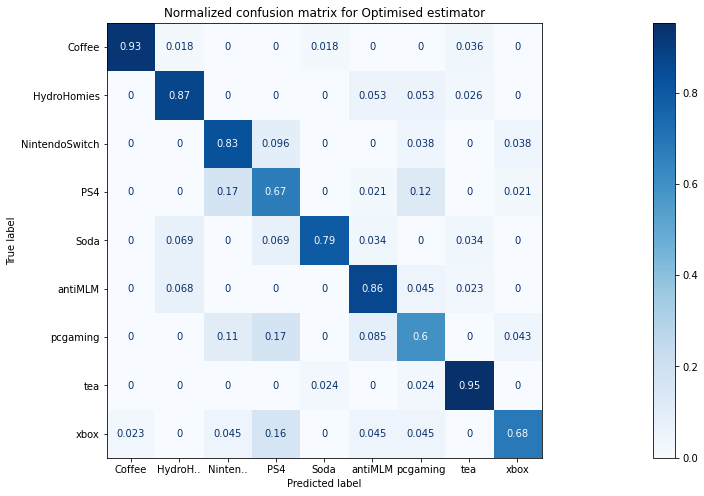

In [284]:
# Normalised confusion matrix (adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=2)

# Print evaluations
def normalised_confusion_matrix(description, classifier, data, true_labels):

  # Plot normalized confusion matrix
  titles_options = [
      ("Normalized confusion matrix for " + description, "true"),
  ]
  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          classifier,
          data,
          true_labels,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)
      disp.figure_.set_size_inches(40, 8)
      # Adapted from https://stackoverflow.com/a/11250884
      labels = [item.get_text() for item in disp.ax_.get_xticklabels()]
      # Shorten labels
      labels = [l[:6] + ".." if len(l) > 8 else l for l in labels]
      disp.ax_.set_xticklabels(labels)

  plt.show()

#Show normalised confusion matrix for the optimised estimator
normalised_confusion_matrix("Optimised estimator", optimised_estimator, test_df, test_labels)


## Q3:

### Q3a:

In [280]:
# Extra feature 1: Use post titles in addition to bodies

multivariate_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('post_title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', TfidfVectorizer(tokenizer=text_pipeline_spacy, binary=True)), 
              ])),
            ('post_body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', TfidfVectorizer(tokenizer=text_pipeline_spacy, binary=True)), 
              ])),
        ])
        )
    ])

# Create new multivariate features
multivariate_train_features = multivariate_pipeline.fit_transform(train_df, train_labels)
multivariate_validation_features = multivariate_pipeline.transform(validation_df)
multivariate_test_features = multivariate_pipeline.transform(test_df)


In [281]:
from sklearn.ensemble import RandomForestClassifier
# Extra feature 2: Use a random forest classifier instead of a logistic regression
forest = RandomForestClassifier()

### Q3b:

In [282]:
# Fit model
new_model = forest.fit(multivariate_train_features,train_labels)

In [285]:
# Evaluate
evaluation_summary("New Model", validation_labels, new_model.predict(multivariate_validation_features))

Evaluation for: New Model
                precision    recall  f1-score   support

        Coffee      0.930     0.952     0.941        42
   HydroHomies      0.822     0.974     0.892        38
NintendoSwitch      0.891     0.788     0.837        52
           PS4      0.580     0.674     0.624        43
          Soda      0.889     0.930     0.909        43
       antiMLM      0.963     0.963     0.963        54
      pcgaming      0.703     0.605     0.650        43
           tea      1.000     0.875     0.933        48
          xbox      0.789     0.811     0.800        37

      accuracy                          0.843       400
     macro avg      0.841     0.841     0.839       400
  weighted avg      0.848     0.843     0.843       400


Confusion matrix:
 [[40  1  0  0  1  0  0  0  0]
 [ 0 37  0  1  0  0  0  0  0]
 [ 0  1 41  8  0  0  2  0  0]
 [ 0  0  2 29  2  1  5  0  4]
 [ 1  2  0  0 40  0  0  0  0]
 [ 0  0  0  1  1 52  0  0  0]
 [ 0  1  3  8  0  1 26  0  4]
 [ 2  2  0  1

### Q3c:

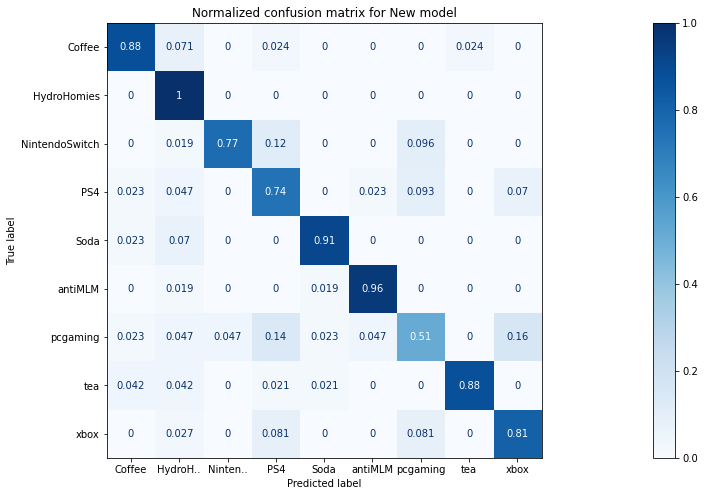

In [279]:
# Print the confusion matrix for the new model
normalised_confusion_matrix("New model", new_model, multivariate_validation_features, validation_labels)